In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from imblearn.over_sampling import SMOTE


In [17]:
df = pd.read_csv('data/cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<AxesSubplot:>

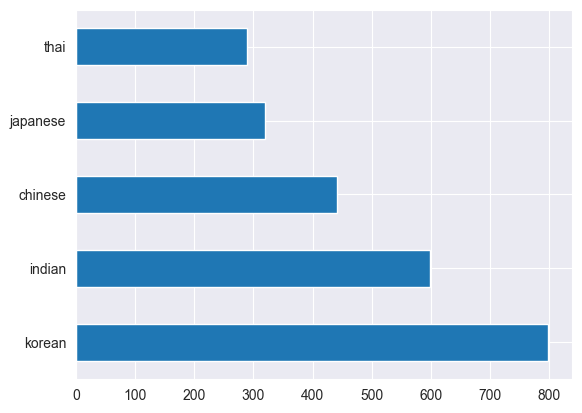

In [18]:
df.cuisine.value_counts().plot.barh()

In [19]:
df.shape

(2448, 385)

In [21]:
thai_df = df[df.cuisine == 'thai']
japanese_df = df[df.cuisine == 'japanese']
chinese_df = df[df.cuisine == 'chinese']
indian_df = df[df.cuisine == 'indian']
korean_df = df[df.cuisine == 'korean']

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [23]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value',ascending=False,inplace=False)
    return ingredient_df


<AxesSubplot:>

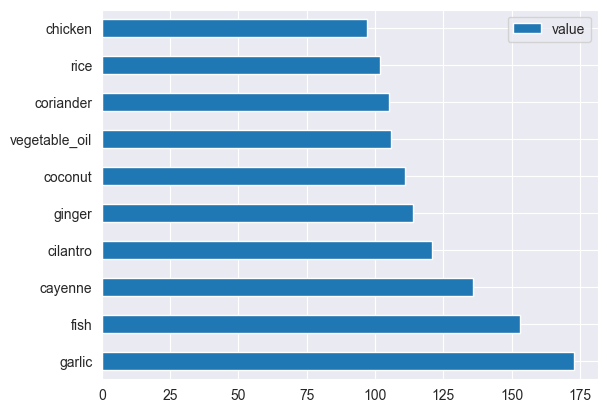

In [24]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

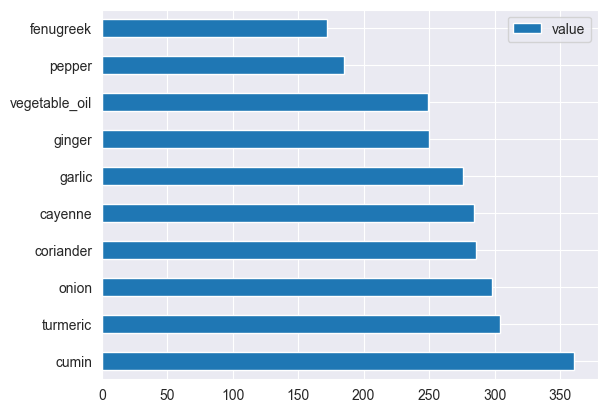

In [25]:
inidan_ingredian_df = create_ingredient_df(indian_df)
inidan_ingredian_df.head(10).plot.barh()

In [28]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
label_df = df.cuisine
feature_df.head()


0         indian
1         indian
2         indian
3         indian
4         indian
          ...   
2443    japanese
2444    japanese
2445    japanese
2446    japanese
2447    japanese
Name: cuisine, Length: 2448, dtype: object

In [29]:
# balance data

oversample = SMOTE()

transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df,label_df)

In [30]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: chinese     799
japanese    799
thai        799
korean      799
indian      799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [31]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

In [32]:
transformed_df

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3992,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,thai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


In [34]:
transformed_df.to_csv('data/clean_cuisines.csv')